<a href="https://colab.research.google.com/github/Davis-Data-Science-Club/R-Tutorial/blob/main/R_Workshop_Fall_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R Workshop - Davis Data Science Club
## Date: 10/25/2023




## R Basics

**Vectors**: 1D data structure. Stores elements of same type.

Syntax:
vec <- c(item_1, item_2, ...)

**Dataframes**: 2D data structure. Collection of two or more series with common indices. Think of it as a list of vectors of equal length. Or even simpler, think of it as a spreadsheet

Syntax:
df <- data.frame(vector_1, vector_2, ...)

**Operators (<- vs =)**
<- : function assigning values on right side to left side
= : can also do the same thing, also used to define arguments.

In R, good practice to use <-

R is a 1-indexed. 1st element in an array starts at index 1, not index 0 like most other programming languages




In [ ]:
# Ways to create an R DataFrame
# Method 1: create each vector first, pass them in to data.frame()

# Vector creation
qbs <- c("Tom Brady", "Peyton Manning", "Russell Wilson")
receivers <- c("Rob Gronkowski", "Marvin Harrison", "Tyler Lockett")
tds <- c(105, 114, 45)

# Pass all necessary vectors into a dataframe
nfl_1 <- data.frame(qbs, receivers, tds)

# vector names become dataframe column names.
nfl_1

# Method 2: provide all vectors directly
nfl_2 <- data.frame(ranking=1:3,
                    players = c("Charles Woodson", "Ed Reed", "Deion Sanders"),
                    interceptions = as.integer(c(65, 64, 53) )
                    )
nfl_2


qbs,receivers,tds
<chr>,<chr>,<dbl>
Tom Brady,Rob Gronkowski,105
Peyton Manning,Marvin Harrison,114
Russell Wilson,Tyler Lockett,45


ranking,players,interceptions
<int>,<chr>,<int>
1,Charles Woodson,65
2,Ed Reed,64
3,Deion Sanders,53


## Read in Data

In [ ]:
# FEV data: data on study on the effects of smoking in children

# read_table() : Read whitespace-separated columns into a dataframe
df <- read.table("//content/Fev.txt")

# 2 ways to read in .csv file
s <- read.csv("//content/Fev.csv")

df_2 <- read.table("//content/Fev.csv", header = TRUE, sep = ",")
# sep indicates a string specifying what is separating the data. Default is " "
# mark header as TRUE when first row includes variable names. Default is False.

# Other import methods
# df_stata <- read.dta("Fev.dta")   # Stata

# install.packages("readxl")        # Excel
# library(readxl)
# df_xlsx <- read_excel("Fev.xlsx")

## Data Exploration

In [ ]:
# print out entire dataframe
# s

# print out first 6 rows of dataframe
# head(s)

# print out first n rows of dataframe
# head(s, n = 10)

# print out last n rows of dataframe
# tail(s, n = 5)

# generate statistical summary of dataframe
summary(s)

     SEQNBR          SUBJID           AGE              FEV       
 Min.   :  1.0   Min.   :  201   Min.   : 3.000   Min.   :0.791  
 1st Qu.:164.2   1st Qu.:15811   1st Qu.: 8.000   1st Qu.:1.981  
 Median :327.5   Median :36071   Median :10.000   Median :2.547  
 Mean   :327.5   Mean   :37170   Mean   : 9.931   Mean   :2.637  
 3rd Qu.:490.8   3rd Qu.:53638   3rd Qu.:12.000   3rd Qu.:3.119  
 Max.   :654.0   Max.   :90001   Max.   :19.000   Max.   :5.793  
     HEIGHT           SEX            SMOKE      
 Min.   :46.00   Min.   :1.000   Min.   :1.000  
 1st Qu.:57.00   1st Qu.:1.000   1st Qu.:2.000  
 Median :61.50   Median :1.000   Median :2.000  
 Mean   :61.14   Mean   :1.486   Mean   :1.901  
 3rd Qu.:65.50   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :74.00   Max.   :2.000   Max.   :2.000  

In [ ]:
# get length of dataframe
len = nrow(s)
cat("There are", len, "rows in the FEV dataframe")

# view column names
colnames(s)



There are 654 rows in the FEV dataframe

[1] "Case_number" "Subj_ID"     "Age"         "Fev"         "Height"     
[6] "Sex"         "Smoke"

### Description of Each Column

| Column   | Description                                       |
|:---------:|:------------------------------------------------:|
| SEQNBR   | Case number                                       |
| SUBJID   | Subject identification number                    |
| AGE      | Subject age at time of measurement (years)       |
| FEV      | Measured FEV (Forced Expiratory Volume - liters per second) |
| HEIGHT   | Subject height at time of measurement (inches)  |
| SEX      | Subject sex (1 = male, 2 = female)               |
| SMOKE    | Smoking habits (1 = yes, 2 = no)                 |


In [ ]:
# Method to rename all column names
colnames(s) <- (c("Case_number", "Subj_ID","Age", "Fev", "Height", "Sex", "Smoke"))
colnames(s)

# Rename specific columns
colnames(s)[1] <- "Index" # replace 1 with desired column index
head(s)

[1] "Case_number" "Subj_ID"     "Age"         "Fev"         "Height"     
[6] "Sex"         "Smoke"

,Index,Subj_ID,Age,Fev,Height,Sex,Smoke
,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,1,301,9,1.708,57.0,2,2
2,2,451,8,1.724,67.5,2,2
3,3,501,7,1.720,54.5,2,2
4,4,642,9,1.558,53.0,1,2
5,5,901,9,1.895,57.0,1,2
6,6,1701,8,2.336,61.0,2,2


## Data Cleansing

Good data scientists pay attention to the following aspects:
* Empty cells in any of the columns (Age, Height, Smoke, etc)
* Outliers
* Duplicate rows
* Inconsistent Data Types in a column
* Inconsisent Data Format in a column (ex. Dates: 10/25/2023 vs. Oct 25, 2023)
* Invalid data in context of dataset (ex: specific time range, etc)
* Irrelevant Columns  
  
Any others you can think of?

We won't delve into all of these aspects today, but it's important to keep them in mind when performing data cleaning.

In [ ]:
# Count total missing values
cat("Total missing values:", sum(is.na(s)))

# Get location of missing values
# which(is.na(s))

# Create logical dataframe (False means non-null)
# is.na(s)

Total missing values: 0

In [ ]:
# return row numbers of null elements in the Height column
which(is.na(s$Height))


# edit value at specific point of dataset (eiteher using big number or row number + Column)

integer(0)

Shows cell numbers that have NA values,
goes down the column and then to rows

when to drop rows or fill with mean/median?

In [ ]:
s$Height[is.na(s$Height)]<-mean(s$Height,na.rm=TRUE)
which(is.na(s))
#na.omit(s)

integer(0)

## Data Manipulation + Visualizations

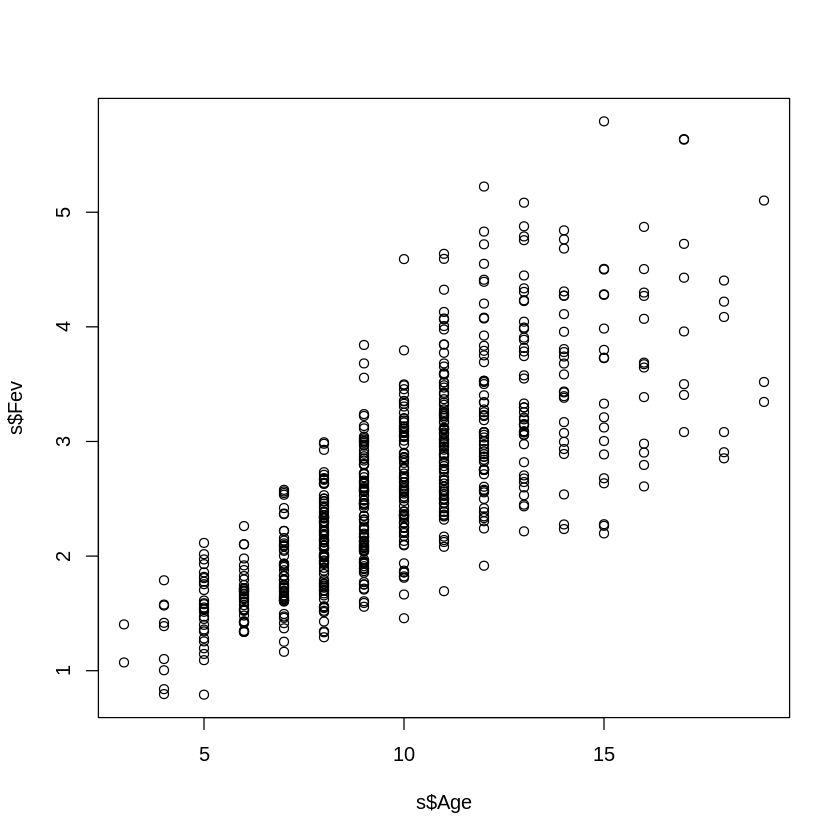

In [ ]:
plot(x=s$Age, y=s$Fev)

In [ ]:
#Outliers = Q1/Q3 +- 1.5*IQR
#IQR = Q3 - Q1
summary(s$Fev)
first<-summary(s$Fev)[2]
third<-summary(s$Fev)[5]

IQR <- IQR(s$Fev)

Lower <- first - 1.5*IQR
Upper <- third + 1.5*IQR
Lower
Upper

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.791   1.981   2.547   2.637   3.119   5.793 

1st Qu. 
0.27475 

3rd Qu. 
4.82475 

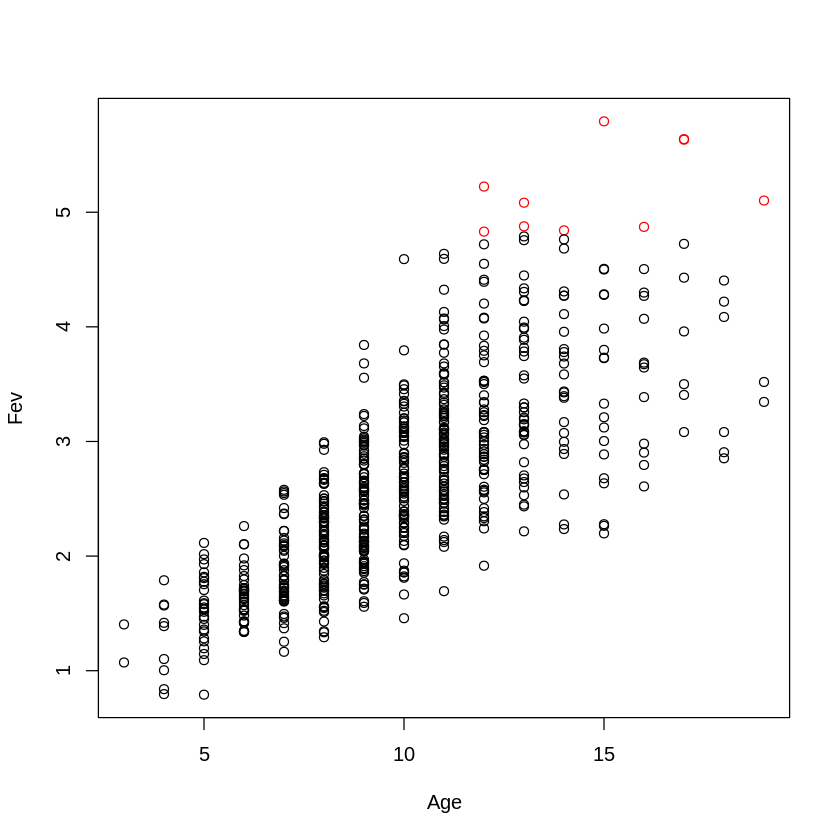

In [ ]:
plot(x=s$Age, y=s$Fev, xlab="Age", ylab="Fev", col=ifelse(s$Fev>Upper | s$Fev <Lower, "red", "black"))

In [ ]:
news <- subset(s, s$Fev > Lower & s$Fev < Upper)

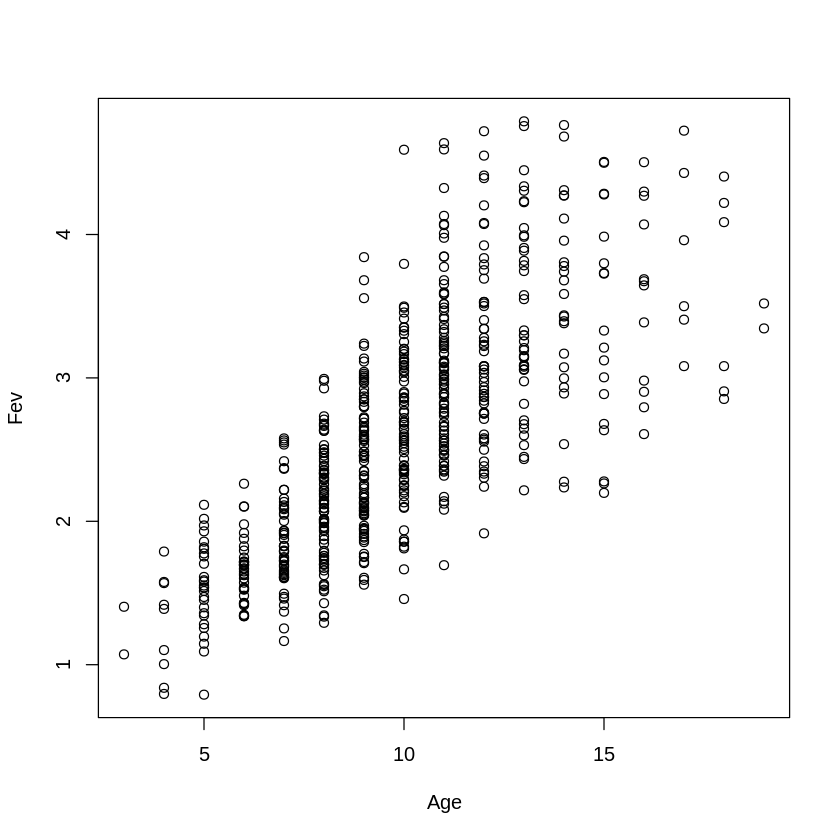

In [ ]:
plot(x=news$Age, y=news$Fev,xlab="Age", ylab="Fev")

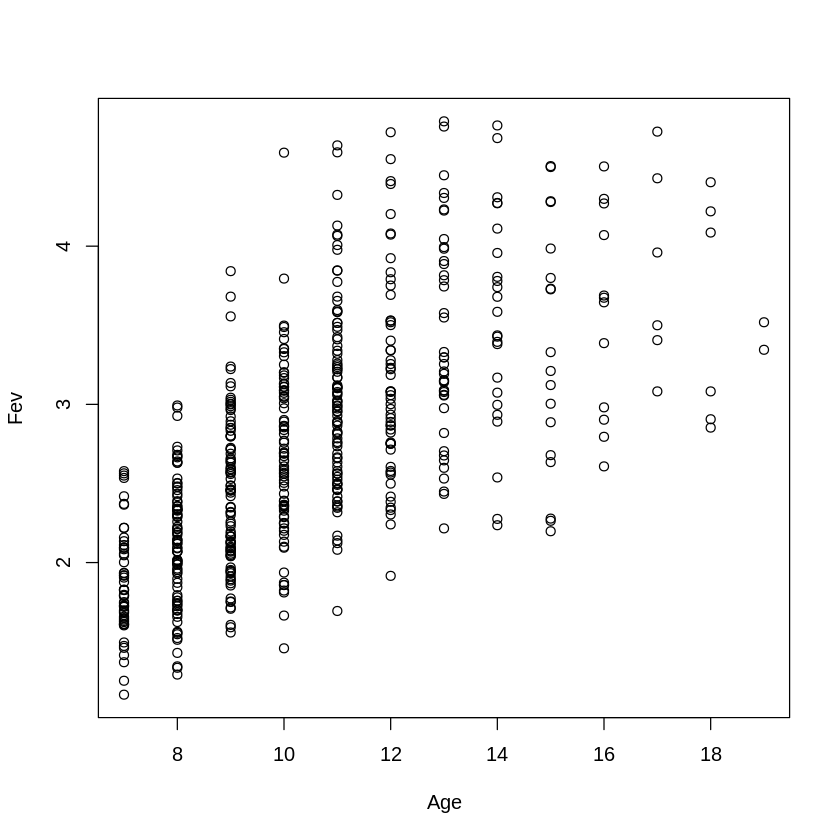

In [ ]:
newsm<-news[news$Age>6,]
plot(x=newsm$Age, y=newsm$Fev,xlab="Age", ylab="Fev")

What if we want to plot Fevs over 1.5? What if we want to plot height against the fev?

In [ ]:
install.packages("tidyverse")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



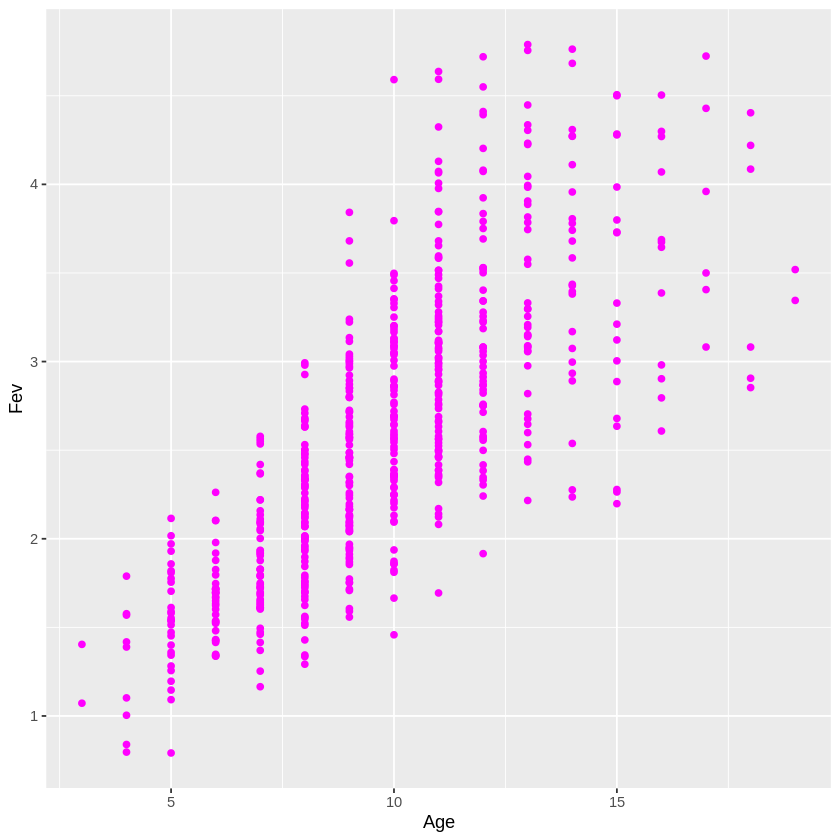

In [ ]:
ggplot(data = news, mapping = aes(x = Age, y = Fev)) + geom_point(alpha = 1, color = "magenta")

## Your Turn!

Spend the next 10-15 minutes and try to solve the questions below in groups of 2-4 using the 'california_housing_test.csv' dataset under the sample_data folder:

1. What is the length of the dataset? How many null values are there?
2. Rename the 'median_house_value' column to 'median_house_val'  
3. Add a column to the housing dataframe which specifies the average number of rooms in each household. Name the column 'rooms_per_household'.   
4. Find the longitude and latitude associated with the largest value found in the 'total_bedrooms' column. Can you print the entire row?
5. ***Some sort of plotting question***
6.



In [89]:
# Type your answers here:

housing = read.csv("//content/sample_data/california_housing_test.csv")

# Q1

# Q2

# Q3

# Q4

# Q5

In [91]:
# Solutions (we will hide this)

# Q1
print(nrow(housing))
cat("Total missing values:", sum(is.na(housing)))

# Q2
colnames(housing)[9] <- "median_house_val"
head(housing)

# Q3
housing$rooms_per_household <- housing$total_rooms / housing$households
head(housing)

# Q4
# Find the row index with the most total_bedrooms
largestNumBedroomsRow <- which.max(housing$total_bedrooms)

# Print the location (method 1)
# cat("Longitude:", housing$longitude[largestNumBedroomsRow], "\n")
# cat("Latitude:", housing$latitude[largestNumBedroomsRow], "\n")

# Print the location (method 2)
print(housing[largestNumBedroomsRow, 1:2])

# Print entire row
# trailing comma specifies to select all columns
print(housing[largestNumBedroomsRow, ])

# Q5



[1] 3000
Total missing values: 0

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_val,rooms_per_household
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-122.05,37.37,27,3885,661,1537,606,6.6085,344700,6.410891
2,-118.30,34.26,43,1510,310,809,277,3.5990,176500,5.451264
3,-117.81,33.78,27,3589,507,1484,495,5.7934,270500,7.250505
4,-118.36,33.82,28,67,15,49,11,6.1359,330000,6.090909
5,-119.67,36.33,19,1241,244,850,237,2.9375,81700,5.236287
6,-119.56,36.51,37,1018,213,663,204,1.6635,67000,4.990196


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_val,rooms_per_household
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-122.05,37.37,27,3885,661,1537,606,6.6085,344700,6.410891
2,-118.30,34.26,43,1510,310,809,277,3.5990,176500,5.451264
3,-117.81,33.78,27,3589,507,1484,495,5.7934,270500,7.250505
4,-118.36,33.82,28,67,15,49,11,6.1359,330000,6.090909
5,-119.67,36.33,19,1241,244,850,237,2.9375,81700,5.236287
6,-119.56,36.51,37,1018,213,663,204,1.6635,67000,4.990196


     longitude latitude
1564   -118.44    33.98
     longitude latitude housing_median_age total_rooms total_bedrooms
1564   -118.44    33.98                 21       18132           5419
     population households median_income median_house_val rooms_per_household
1564       7431       4930        5.3359           500001             3.67789
